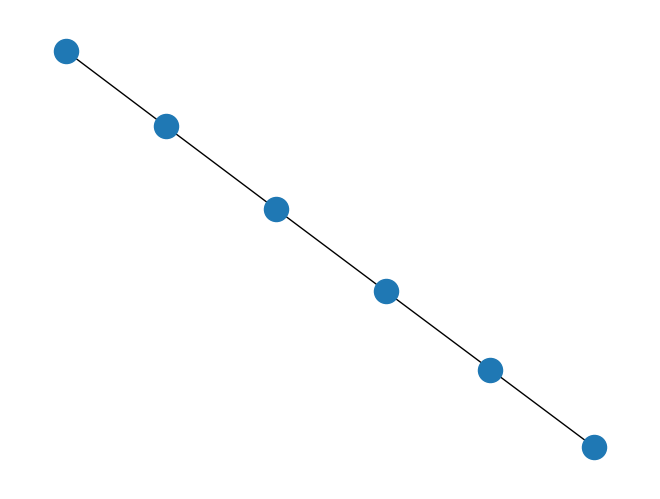

In [7]:
from rustworkx.visualization import mpl_draw
import rustworkx as rx
import numpy as np
n = 6
graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
elist = []
# print(QiskitRuntimeService(channel='ibm_quantum').backend("ibm_brisbane").coupling_map)
# QiskitRuntimeService(channel='ibm_quantum').backend("ibm_brisbane").coupling_map
coupling = [[1, 0], [2, 1], [3, 2], [4, 3], [4, 5], [4, 15], [6, 5], [6, 7], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [12, 17], [13, 12], [14, 0], [14, 18], [15, 22], [16, 8], [16, 26], [17, 30], [18, 19], [20, 19], [20, 33], [21, 20], [21, 22], [22, 23], [24, 23], [24, 34], [25, 24], [26, 25], [27, 26], [28, 27], [28, 29], [28, 35], [30, 29], [30, 31], [31, 32], [32, 36], [33, 39], [34, 43], [35, 47], [36, 51], [37, 38], [39, 38], [40, 39], [40, 41], [41, 53], [42, 41], [42, 43], [43, 44], [44, 45], [46, 45], [46, 47], [48, 47], [48, 49], [50, 49], [50, 51], [52, 37], [52, 56], [53, 60], [54, 45], [54, 64], [55, 49], [55, 68], [56, 57], [57, 58], [58, 59], [58, 71], [59, 60], [60, 61], [62, 61], [62, 63], [62, 72], [63, 64], [65, 64], [65, 66], [67, 66], [67, 68], [69, 68], [69, 70], [73, 66], [74, 70], [74, 89], [75, 90], [76, 75], [77, 71], [77, 76], [77, 78], [79, 78], [79, 80], [80, 81], [81, 72], [81, 82], [82, 83], [83, 92], [84, 83], [85, 73], [85, 84], [85, 86], [86, 87], [87, 88], [88, 89], [91, 79], [92, 102], [93, 87], [93, 106], [94, 90], [94, 95], [95, 96], [97, 96], [97, 98], [98, 91], [99, 98], [100, 99], [100, 110], [101, 100], [101, 102], [102, 103], [104, 103], [105, 104], [105, 106], [107, 106], [108, 107], [108, 112], [109, 96], [110, 118], [111, 104], [112, 126], [113, 114], [114, 109], [114, 115], [116, 115], [116, 117], [117, 118], [118, 119], [120, 119], [121, 120], [122, 111], [122, 121], [122, 123], [124, 123], [125, 124], [125, 126]]
for edge in coupling:
    if edge[0] < n and edge[1] < n:
        elist.append((edge[0], edge[1], 1.0))
graph.add_edges_from(elist)
# path_graph = rx.generators.directed_path_graph(5)
mpl_draw(graph)

In [23]:
from benchmark_utils import *
# from qiskit_addon_cutting_custom import *

In [24]:
circuit5 = generate_circ(num_qubits=5, circuit_type='qft', seed=42)
circuit3 = generate_circ(num_qubits=3, circuit_type='qft', seed=42)
circuit4 = generate_circ(num_qubits=4, circuit_type='qft', seed=42)
circuit8 = generate_circ(num_qubits=8, circuit_type='qft', seed=42)
circuit10 = generate_circ(num_qubits=10, circuit_type='qft', seed=42)
circuit6 = generate_circ(num_qubits=6, circuit_type='qft', seed=42)

In [ ]:
m = 7
n = 10
cuts = 0
for i in range(1,int(np.ceil(n/m))):
    cuts += m*(n-i*m)
print(cuts)

In [ ]:
optimization_settings = OptimizationParameters(seed=111) 
device_constraints = DeviceConstraints(qubits_per_subcircuit=3)
cut_circuit, metadata = find_cuts(circuit6, optimization_settings, device_constraints)
print(
    f'{len(metadata["cuts"])} cuts ({len(metadata["gate_cuts"])} gate {len(metadata["wire_cuts"])} wire cuts)'
)
qc_w_ancilla = cut_wires(cut_circuit)
partitioned_problem = partition_problem(circuit=qc_w_ancilla)
subcircuit = partitioned_problem.subcircuits
subcircuits = [cuts_filter(s) for s in subcircuit.values()]

In [ ]:
qc_w_ancilla.draw('mpl', scale=0.8)

In [ ]:
circuit3.draw(fold=-1)

In [ ]:
circuit5.draw(fold=-1)

In [ ]:
circuit8.draw(fold=-1)

In [ ]:
circuit10.draw(fold=-1)

In [ ]:
circ3 = build_lattice_hamiltonian(num_spins=3**2, Dimension=(3,3), model='Ising')

Found solution using 7 cuts with a sampling overhead of 459.58000669210037.
Lowest cost solution found: True.
Gate Cut at circuit instruction index 6
Gate Cut at circuit instruction index 7
Wire Cut at circuit instruction index 8
Gate Cut at circuit instruction index 11
Gate Cut at circuit instruction index 12
Gate Cut at circuit instruction index 16
Gate Cut at circuit instruction index 17


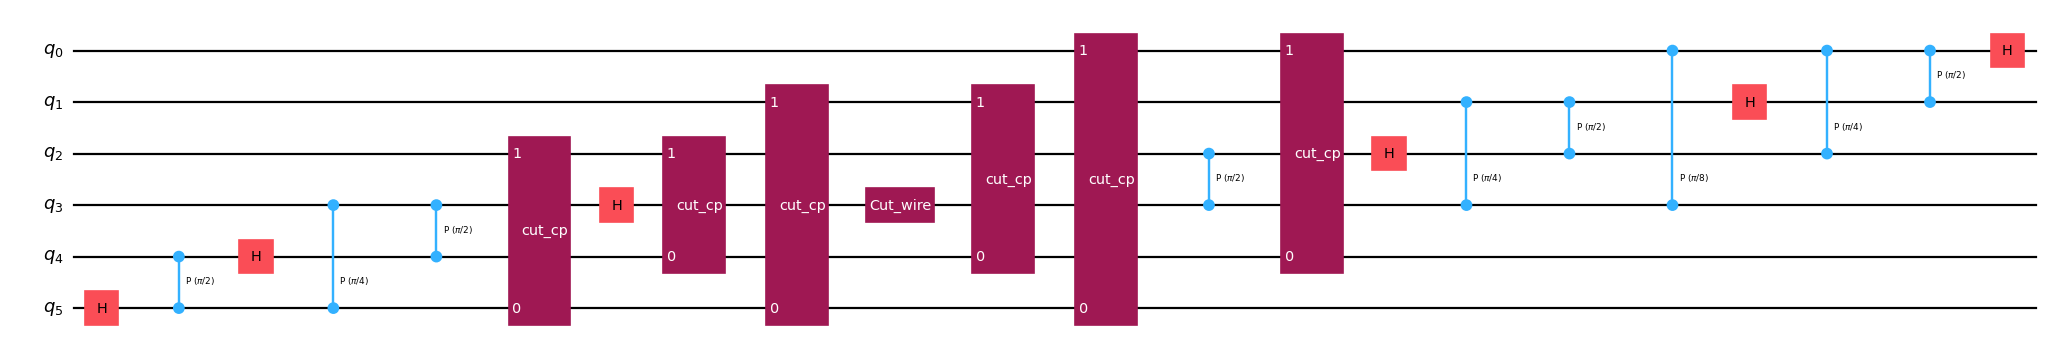

In [34]:
from qiskit_addon_cutting.automated_cut_finding import (
    find_cuts,
    OptimizationParameters,
    DeviceConstraints,
)

# Specify settings for the cut-finding optimizer
optimization_settings = OptimizationParameters(seed=111)

# Specify the size of the QPUs available
device_constraints = DeviceConstraints(qubits_per_subcircuit=4)

cut_circuit, metadata = find_cuts(circuit6, optimization_settings, device_constraints)
print(
    f'Found solution using {len(metadata["cuts"])} cuts with a sampling '
    f'overhead of {metadata["sampling_overhead"]}.\n'
    f'Lowest cost solution found: {metadata["minimum_reached"]}.'
)
for cut in metadata["cuts"]:
    print(f"{cut[0]} at circuit instruction index {cut[1]}")
cut_circuit.draw("mpl", scale=0.8, fold=-1)

In [21]:
for idx, _instruction in reversed(list(enumerate(circuit6.data))):
    if _instruction.operation.num_qubits == 1:
        del circuit6.data[idx]

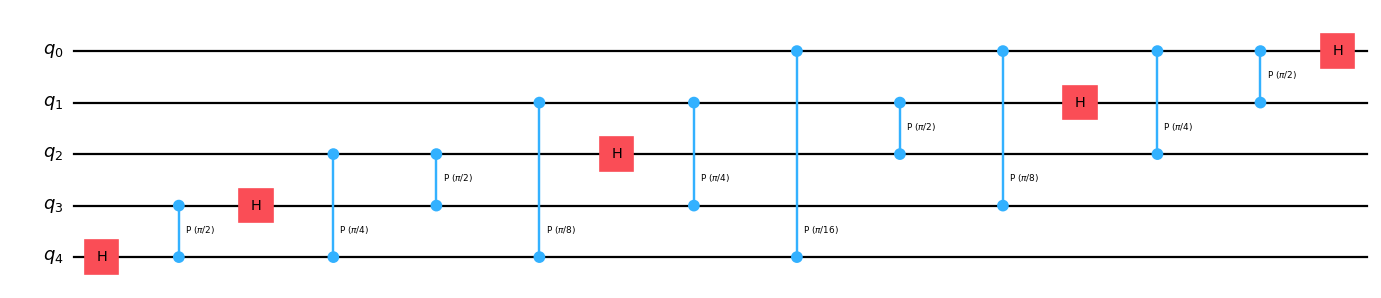

In [16]:
circuit5.draw('mpl',scale=0.8,fold=-1)

In [35]:
from qiskit_addon_cutting import cut_wires, expand_observables

qc_w_ancilla = cut_wires(cut_circuit)
# observables_expanded = expand_observables(observable.paulis, circuit, qc_w_ancilla)
# qc_w_ancilla.draw("mpl", scale=0.8, fold=-1)
from qiskit_addon_cutting import partition_problem

partitioned_problem = partition_problem(
    circuit=qc_w_ancilla
)
subcircuits = partitioned_problem.subcircuits
# subobservables = partitioned_problem.subobservables
print(
    f"Sampling overhead: {np.prod([basis.overhead for basis in partitioned_problem.bases])}"
)
from qiskit_addon_cutting import generate_cutting_experiments

# subexperiments, coefficients = generate_cutting_experiments(
#     circuits=subcircuits, observables=subobservables, num_samples=1_000
# )
# print(
#     f"{len(subexperiments[0]) + len(subexperiments[1])} total subexperiments to run on backend."
# )

Sampling overhead: 459.58000669210037


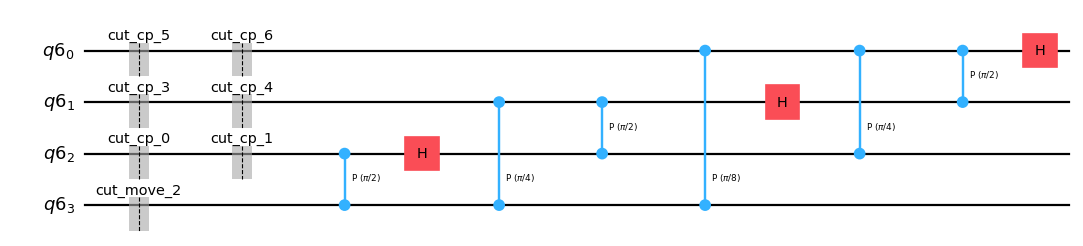

In [39]:
subcircuits[0].draw("mpl", style="iqp", scale=0.8)

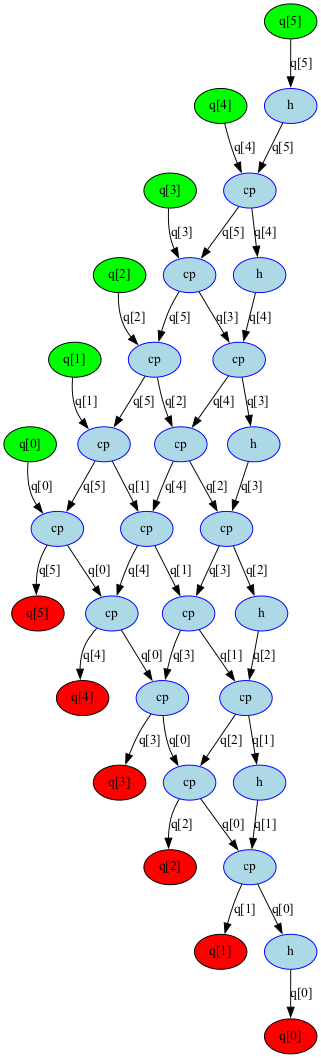

In [27]:
# from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

dag = circuit_to_dag(circuit6)
dag_drawer(dag)

In [ ]:
# Specify settings for the cut-finding optimizer
optimization_settings = OptimizationParameters(seed=111)

# Specify the size of the QPUs available
device_constraints = DeviceConstraints(qubits_per_subcircuit=4)

cut_circuit, metadata = find_cuts(circ3, optimization_settings, device_constraints)
print(
    f'Found solution using {len(metadata["cuts"])} cuts with a sampling '
    f'overhead of {metadata["sampling_overhead"]}.\n'
    f'Lowest cost solution found: {metadata["minimum_reached"]}.'
)
for cut in metadata["cuts"]:
    print(f"{cut[0]} at circuit instruction index {cut[1]}")
cut_circuit.draw("mpl", scale=0.8, fold=-1)

In [ ]:
# optimization_settings = OptimizationParameters(seed=111) 
# device_constraints = DeviceConstraints(qubits_per_subcircuit=5)
# cut_circuit, metadata = find_cuts(circ3, optimization_settings, device_constraints)
# print(
#     f'{len(metadata["cuts"])} cuts ({len(metadata["gate_cuts"])} gate {len(metadata["wire_cuts"])} wire cuts)'
# )
qc_w_ancilla = cut_wires(cut_circuit)
partitioned_problem = partition_problem(circuit=qc_w_ancilla)
subcircuit = partitioned_problem.subcircuits
subcircuits = [cuts_filter(s) for s in subcircuit.values()]

In [ ]:
A = np.random.randn(2**2, 2**2)
full_circ, alpha = fable(A, 0)

In [ ]:
full_circ.draw(fold=-1)

In [ ]:
c = QAOA_ansatz(num_qubit=4, reps=2)
c.draw(fold=-1)

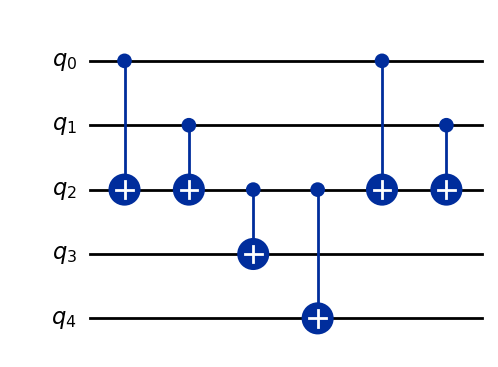

In [42]:
import numpy as np
from qiskit import QuantumCircuit

qc_0 = QuantumCircuit(5)
qc_0.cx(0, 2)
qc_0.cx(1, 2)
qc_0.cx(2, 3)
qc_0.cx(2, 4)
qc_0.cx(0, 2)
qc_0.cx(1, 2)
qc_0.draw("mpl")

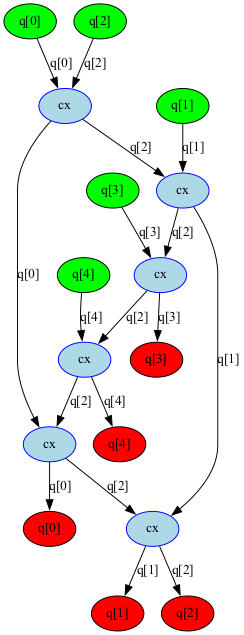

In [56]:
dag = circuit_to_dag(qc_0)
dag_drawer(dag)

In [61]:
from rustworkx.visualization import graphviz_draw
dag = rx.PyDiGraph(check_cycle=True)
g = rx.PyDiGraph()
# Input nodes:
in_nodes = dag.add_nodes_from(["q_0", "q_1", "c_0", "c_1"])
# Output nodes
# out_nodes = dag.add_nodes_from(["q_0", "q_1", "c_0", "c_1"])
# Add H gate
# h_gate = dag.add_child(in_nodes[0], "h", "q_0")
# Add CX Gate
cx_gate = dag.add_child(h_gate, "cx", "q_0")
dag.add_edge(in_nodes[1], cx_gate, "q_1")
# Add measure Gates
# meas_q0 = dag.add_child(cx_gate, "measure", "q_0")
# meas_q1 = dag.add_child(cx_gate, "measure", "q_1")
# Measure q0 instruction edges
# dag.add_edge(meas_q0, out_nodes[0], "q_0")
# dag.add_edge(in_nodes[2], meas_q0, "c_0")
# dag.add_edge(meas_q0, out_nodes[2], "c_0")
# # Measure q1 instruction edges
# dag.add_edge(meas_q1, out_nodes[1], "q_1")
# dag.add_edge(in_nodes[3], meas_q1, "c_1")
# dag.add_edge(meas_q1, out_nodes[3], "c_1")

graphviz_draw(
    dag,
    node_attr_fn=lambda node: {"label": str(node)},
    edge_attr_fn=lambda edge: {"label": str(edge)}
)

thread '<unnamed>' panicked at /Users/runner/.cargo/registry/src/index.crates.io-6f17d22bba15001f/petgraph-0.6.4/src/graph_impl/stable_graph/mod.rs:402:17:
StableGraph::add_edge: node index 8 is not a node in the graph
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: StableGraph::add_edge: node index 8 is not a node in the graph

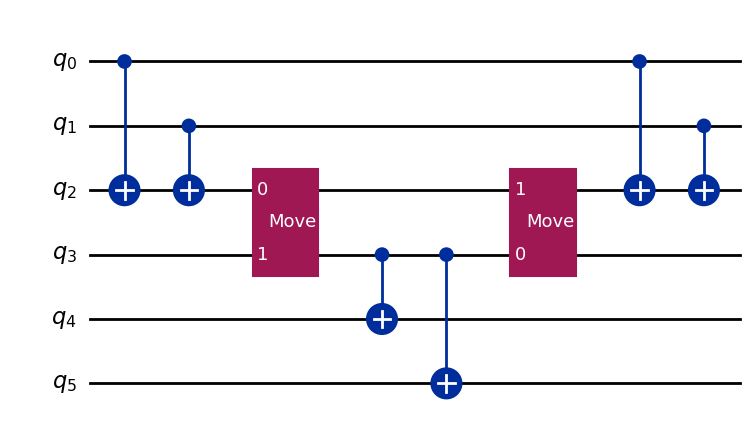

In [51]:
from qiskit_addon_cutting.instructions import Move
qc_1 = QuantumCircuit(6)
qc_1.cx(0, 2)
qc_1.cx(1, 2)
qc_1.append(Move(), [2, 3])
qc_1.cx(3, 4)
qc_1.cx(3, 5)
qc_1.append(Move(),[3,2])
qc_1.cx(0, 2)
qc_1.cx(1, 2)
qc_1.draw("mpl")

In [52]:
from qiskit_addon_cutting import partition_problem

partitioned_problem = partition_problem(
    circuit=qc_1, partition_labels="AAABBB"
)
subcircuits = partitioned_problem.subcircuits
subobservables = partitioned_problem.subobservables
bases = partitioned_problem.bases

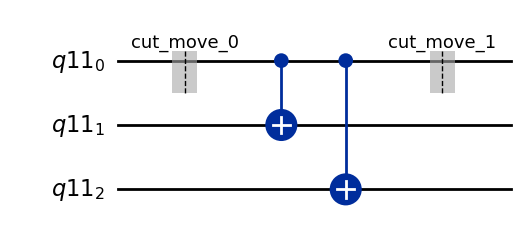

In [55]:
subcircuits["B"].draw("mpl")